In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =  pd.read_csv('/content/cars.csv')

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [ ]:
df.shape

(8128, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB


In [ ]:
df.describe()

,km_driven,selling_price
count,8.128000e+03,8.128000e+03
mean,6.981951e+04,6.382718e+05
std,5.655055e+04,8.062534e+05
min,1.000000e+00,2.999900e+04
25%,3.500000e+04,2.549990e+05
50%,6.000000e+04,4.500000e+05
75%,9.800000e+04,6.750000e+05
max,2.360457e+06,1.000000e+07


In [ ]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [ ]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [ ]:

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fuel']= le.fit_transform(df['fuel'])


In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [ ]:
df['brand'].nunique()

32

In [ ]:
le=LabelEncoder()
df['fuel']= le.fit_transform(df['fuel'])

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,1,First Owner,450000
1,Skoda,120000,1,Second Owner,370000
2,Honda,140000,3,Third Owner,158000
3,Hyundai,127000,1,First Owner,225000
4,Maruti,120000,3,First Owner,130000


In [ ]:
df['owner'].nunique()

5

In [ ]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car']])
df[['owner']]= oe.fit_transform(df[['owner']])

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,1,0.0,450000
1,Skoda,120000,1,1.0,370000
2,Honda,140000,3,2.0,158000
3,Hyundai,127000,1,0.0,225000
4,Maruti,120000,3,0.0,130000


<Axes: xlabel='km_driven'>

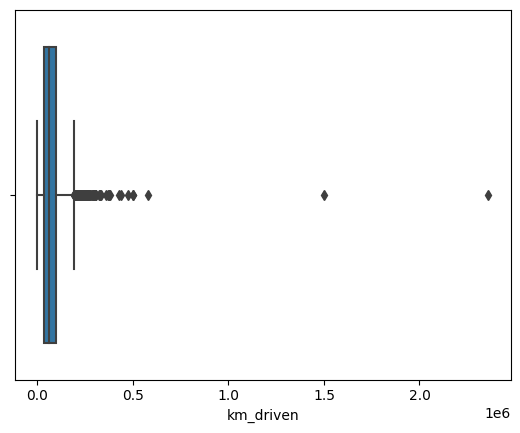

In [ ]:
sns.boxplot(data=df, x="km_driven")

In [ ]:
print("Std value of cgpa",df['km_driven'].std())
print("Min value of cgpa",df['km_driven'].min())
print("Max value of cgpa",df['km_driven'].max())

Std value of cgpa 56550.554958219196
Min value of cgpa 1
Max value of cgpa 2360457


In [ ]:
df['km_driven'].nunique()

921

In [ ]:
upper_limit= df['km_driven'].mean() + 3*df['km_driven'].std()
lower_limit= df['km_driven'].mean() - 3*df['km_driven'].std()

In [ ]:
outlier = df[(df['km_driven'] > upper_limit) | (df['km_driven'] < lower_limit)]
new_df = df[(df['km_driven'] < upper_limit) & (df['km_driven'] > lower_limit)]

In [ ]:
new_df.shape

(8056, 5)

In [ ]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,20,145500,1,0.0,450000
1,27,120000,1,1.0,370000
2,10,140000,3,2.0,158000
3,11,127000,1,0.0,225000
4,20,120000,3,0.0,130000


In [ ]:
X = df.drop(columns=['selling_price'],axis=1)
Y = df['selling_price']

In [ ]:
Y

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8123    320000
8124    135000
8125    382000
8126    290000
8127    290000
Name: selling_price, Length: 8128, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [ ]:
X.head()

,brand,km_driven,fuel,owner
0,20,145500,1,0.0
1,27,120000,1,1.0
2,10,140000,3,2.0
3,11,127000,1,0.0
4,20,120000,3,0.0


In [ ]:
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
X_scaled.head()

,0,1,2,3
0,0.272216,1.338363,-0.889115,-0.640403
1,1.222516,0.887411,-0.889115,0.745063
2,-1.085356,1.241098,1.106392,2.130528
3,-0.949599,1.011202,-0.889115,-0.640403
4,0.272216,0.887411,1.106392,-0.640403
